<a href="https://colab.research.google.com/github/jkcarter1/Phys202L/blob/main/Use_this_Electric_Force_Analysis_PowerLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3:  Electric Force
Vicky Dam, Christiana Cole, Brooke Keyes, Julia Carter, Katie Wagner

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = False
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

# Determining the Path of Electrons

In [3]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [x_cm, dx_cm, y_cm, dy_cm]

data1 = [[2.3,0.1,0.00,0.01], [3.00,0.01,0.07,0.1], [4.00,0.01,0.15,0.1], [5.00,0.01,0.25,0.1], [6.00,0.01,0.50,0.1], [7.00,0.01,0.90,0.1], [8.00,0.01,1.15,0.1], [9.00,0.01,1.60,0.1], [10.00,0.01,2.00,0.1]]
# create dataframe
df1 = pd.DataFrame(data1, columns = ['x_cm', 'dx_cm','y_cm','dy_cm'])

print('Accelerating voltage = 4.49 kV:')
print(df1.to_string(index=False))

data2 = [[2.3,0.1,0.02,0.01], [3.0,0.01,0.09,0.1], [4.0,0.01,0.15,0.1], 
         [5.0,0.01,0.30,0.1], [6.0,0.01,0.80,0.1], [7.0,0.01,1.15,0.1], [8.0,0.01,1.50,0.1], [9.0,0.01,2.0,0.1], [10.0,0.01,2.5,0.1]]
# create dataframe
df2 = pd.DataFrame(data2, columns = ['x_cm', 'dx_cm','y_cm','dy_cm'])

print()
print('Accelerating voltage = 3.51 kV:')
print(df2.to_string(index=False))

data3 = [[2.3,0.1,0.05,0.01], [3.0,0.01,0.1,0.1], [4.0,0.01,0.2,0.1], 
         [5.0,0.01,0.6,0.1], [6.0,0.01,1.15,0.1], [7.0,0.01,1.6,0.1], [8.0,0.01,2.2,0.1], [9.0,0.01,2.5,0.1]]
# create dataframe
df3 = pd.DataFrame(data3, columns = ['x_cm', 'dx_cm','y_cm','dy_cm'])

print()
print('Accelerating voltage = 2.52 kV:')
print(df3.to_string(index=False))

Accelerating voltage = 4.49 kV:
 x_cm  dx_cm  y_cm  dy_cm
  2.3   0.10  0.00   0.01
  3.0   0.01  0.07   0.10
  4.0   0.01  0.15   0.10
  5.0   0.01  0.25   0.10
  6.0   0.01  0.50   0.10
  7.0   0.01  0.90   0.10
  8.0   0.01  1.15   0.10
  9.0   0.01  1.60   0.10
 10.0   0.01  2.00   0.10

Accelerating voltage = 3.51 kV:
 x_cm  dx_cm  y_cm  dy_cm
  2.3   0.10  0.02   0.01
  3.0   0.01  0.09   0.10
  4.0   0.01  0.15   0.10
  5.0   0.01  0.30   0.10
  6.0   0.01  0.80   0.10
  7.0   0.01  1.15   0.10
  8.0   0.01  1.50   0.10
  9.0   0.01  2.00   0.10
 10.0   0.01  2.50   0.10

Accelerating voltage = 2.52 kV:
 x_cm  dx_cm  y_cm  dy_cm
  2.3   0.10  0.05   0.01
  3.0   0.01  0.10   0.10
  4.0   0.01  0.20   0.10
  5.0   0.01  0.60   0.10
  6.0   0.01  1.15   0.10
  7.0   0.01  1.60   0.10
  8.0   0.01  2.20   0.10
  9.0   0.01  2.50   0.10


In [4]:
df1['x'] = 0.01*(df1['x_cm'])
df1['dx'] = 0.01*df1['dx_cm']
df1['y'] = 0.01*df1['y_cm']
df1['dy'] = 0.01*df1['dy_cm']

print('Accelerating voltage = 4.5 kV:')
print(df1.to_string(index=False))

df2['x'] = 0.01*(df2['x_cm'])
df2['dx'] = 0.01*df2['dx_cm']
df2['y'] = 0.01*df2['y_cm']
df2['dy'] = 0.01*df2['dy_cm']

print()
print('Accelerating voltage = 3.5 kV:')
print(df2.to_string(index=False))

df3['x'] = 0.01*(df3['x_cm'])
df3['dx'] = 0.01*df3['dx_cm']
df3['y'] = 0.01*df3['y_cm']
df3['dy'] = 0.01*df3['dy_cm']

print()
print('Accelerating voltage = 2.5 kV:')
print(df3.to_string(index=False))

Accelerating voltage = 4.5 kV:
 x_cm  dx_cm  y_cm  dy_cm     x     dx      y     dy
  2.3   0.10  0.00   0.01 0.023 0.0010 0.0000 0.0001
  3.0   0.01  0.07   0.10 0.030 0.0001 0.0007 0.0010
  4.0   0.01  0.15   0.10 0.040 0.0001 0.0015 0.0010
  5.0   0.01  0.25   0.10 0.050 0.0001 0.0025 0.0010
  6.0   0.01  0.50   0.10 0.060 0.0001 0.0050 0.0010
  7.0   0.01  0.90   0.10 0.070 0.0001 0.0090 0.0010
  8.0   0.01  1.15   0.10 0.080 0.0001 0.0115 0.0010
  9.0   0.01  1.60   0.10 0.090 0.0001 0.0160 0.0010
 10.0   0.01  2.00   0.10 0.100 0.0001 0.0200 0.0010

Accelerating voltage = 3.5 kV:
 x_cm  dx_cm  y_cm  dy_cm     x     dx      y     dy
  2.3   0.10  0.02   0.01 0.023 0.0010 0.0002 0.0001
  3.0   0.01  0.09   0.10 0.030 0.0001 0.0009 0.0010
  4.0   0.01  0.15   0.10 0.040 0.0001 0.0015 0.0010
  5.0   0.01  0.30   0.10 0.050 0.0001 0.0030 0.0010
  6.0   0.01  0.80   0.10 0.060 0.0001 0.0080 0.0010
  7.0   0.01  1.15   0.10 0.070 0.0001 0.0115 0.0010
  8.0   0.01  1.50   0.10 0.080 0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


Beta: [2.06774664e+00 2.29585881e-02 1.80562364e+00 2.10234604e-06]
Beta Std Error: [1.22618284e+00 7.89228329e-03 2.94889468e-01 5.34928156e-05]
Beta Covariance: [[ 5.57228096e+00 -3.32428350e-02  1.33240259e+00 -4.78855442e-05]
 [-3.32428350e-02  2.30848932e-04 -8.28788168e-03  4.07409780e-07]
 [ 1.33240259e+00 -8.28788168e-03  3.22285719e-01 -1.24456846e-05]
 [-4.78855442e-05  4.07409780e-07 -1.24456846e-05  1.06050679e-08]]
Residual Variance: 0.2698220648201754
Inverse Condition #: 0.004320688202720011
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (2.0677 +/- 1.2262)(X - (0.0230 +/- 0.0079))^(1.8056 +/- 0.2949) + (0.0000 +/- 0.0001)


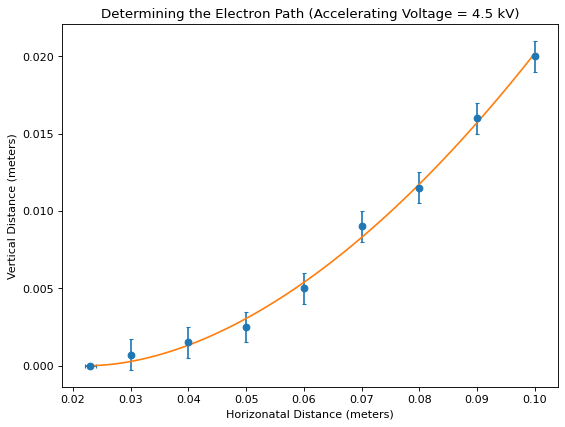

In [5]:
xi = df1['x']
yi = df1['y']
sigmaxi = df1['dx']
sigmayi = df1['dy']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b+d'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*(x-B[1])**B[2] + B[3]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[2.55, 0.02, 1.8, 0.0002]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

yfit = fitfunction(popt,xl)

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)(X - (%0.4f +/- %0.4f))^(%0.4f +/- %0.4f) + (%0.4f +/- %0.4f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2],popt[3],perr[3]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

#plt.plot(xl,middle)
#plt.plot(xl,lower)
#plt.plot(xl,upper)
plt.plot(xl,yfit)

#########################

plt.xlabel('Horizonatal Distance (meters)')
plt.ylabel('Vertical Distance (meters)')
plt.title('Determining the Electron Path (Accelerating Voltage = 4.5 kV)')
plt.show()

## Analysis of Electron Path:   Accelerating Voltage = 4.5 kV

First of all, we see that the fit is non-linear, as expected, and appears to be roughly quadratic.

From the theory, we expect:

$y = C(x-x_i)^\alpha + y_i$

where:

$C = \frac{V_p}{4 d_{eff} V_a}$

We see that the coefficient C is $(2.57 \pm 0.17)$.

The theory predicts that this coefficient should be equal to: $\frac{V_p}{4 d_{eff} V_a}$.  Thus, we can calculate that:

$d_{eff} = \frac{V_p}{4 C V_a}$

and 

$ \delta(d_{eff}) = d_{eff} \left( \frac{\delta(V_p)}{V_p} + \frac{\delta(V_a)}{V_a} + \frac{\delta(C)}{C} \right) $

In [6]:
Va = 4.50
dVa = 0.01
Vp = 3.64
dVp = 0.01
C = popt[0]
dC = perr[0]
x_i1 = popt[1]
dx_i1 = perr[1]
alpha1 = popt[2]
dalpha1 = perr[2]
y_i1 = popt[3]
dy_i1 = perr[3]

deff1 = Vp/(4*C*Va)

ddeff1 = deff1*(dVp/Vp+dVa/Va+dC/C)

print('d$_{eff} = (%0.3f +/- %0.3f)' % (deff1,ddeff1))

print('xi = (%0.5f +/- %0.5f)' % (x_i1,dx_i1))
print('yi = (%0.5f +/- %0.5f)' % (y_i1,dy_i1))
print('alpha = (%0.5f +/- %0.5f)' % (alpha1,dalpha1))

d$_{eff} = (0.098 +/- 0.058)
xi = (0.02296 +/- 0.00789)
yi = (0.00000 +/- 0.00005)
alpha = (1.80562 +/- 0.29489)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


Beta: [nan nan nan nan]
Beta Std Error: [0. 0. 0. 0.]
Beta Covariance: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Residual Variance: 0.0
Inverse Condition #: nan
Reason(s) for Halting:
  Numerical error detected

Final Result: Y = (nan +/- 0.0000)(X - (nan +/- 0.0000))^(nan +/- 0.0000) + (nan +/- 0.0000)


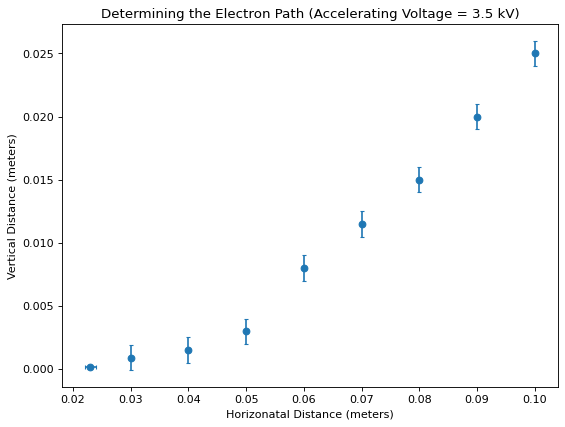

In [10]:
xi = df2['x']
yi = df2['y']
sigmaxi = df2['dx']
sigmayi = df2['dy']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b+d'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*(x-B[1])**B[2] + B[3]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[3.00, 0.023, 1.60, -0.00000]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

yfit = fitfunction(popt,xl)

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)(X - (%0.4f +/- %0.4f))^(%0.4f +/- %0.4f) + (%0.4f +/- %0.4f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2],popt[3],perr[3]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

#plt.plot(xl,middle)
#plt.plot(xl,lower)
#plt.plot(xl,upper)
plt.plot(xl,yfit)

#########################

plt.xlabel('Horizonatal Distance (meters)')
plt.ylabel('Vertical Distance (meters)')
plt.title('Determining the Electron Path (Accelerating Voltage = 3.5 kV)')
plt.show()



In [ ]:
Va = 3.50
dVa = 0.01
Vp = 3.64
dVp = 0.01
C = popt[0]
dC = perr[0]
x_i2 = popt[1]
dx_i2 = perr[1]
alpha2 = popt[2]
dalpha2 = perr[2]
y_i2 = popt[3]
dy_i2 = perr[3]

deff2 = Vp/(4*C*Va)

ddeff2 = deff2*(dVp/Vp+dVa/Va+dC/C)

print('d$_{eff} = (%0.3f +/- %0.3f)' % (deff2,ddeff2))

print('xi = (%0.5f +/- %0.5f)' % (x_i2,dx_i2))
print('yi = (%0.5f +/- %0.5f)' % (y_i2,dy_i2))
print('alpha = (%0.5f +/- %0.5f)' % (alpha2,dalpha2))



d$_{eff} = (0.135 +/- 0.040)
xi = (0.01744 +/- 0.00533)
yi = (-0.00006 +/- 0.00027)
alpha = (1.71964 +/- 0.15307)


Beta: [ 3.17996363e+00  1.72791180e-02  1.76177458e+00 -9.06523236e-05]
Beta Std Error: [2.39649045e+00 1.12116860e-02 3.70756680e-01 7.29098313e-04]
Beta Covariance: [[ 2.30580356e+00 -1.03104718e-02  3.55493231e-01 -5.49654873e-04]
 [-1.03104718e-02  5.04676119e-05 -1.62948003e-03  2.95349040e-06]
 [ 3.55493231e-01 -1.62948003e-03  5.51885357e-02 -8.87514014e-05]
 [-5.49654873e-04  2.95349040e-06 -8.87514014e-05  2.13423918e-07]]
Residual Variance: 2.490744031553536
Inverse Condition #: 0.0005403866497590544
Reason(s) for Halting:
  Sum of squares convergence


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power



Final Result: Y = (3.1800 +/- 2.3965)(X - (0.0173 +/- 0.0112))^(1.7618 +/- 0.3708) + (-0.0001 +/- 0.0007)


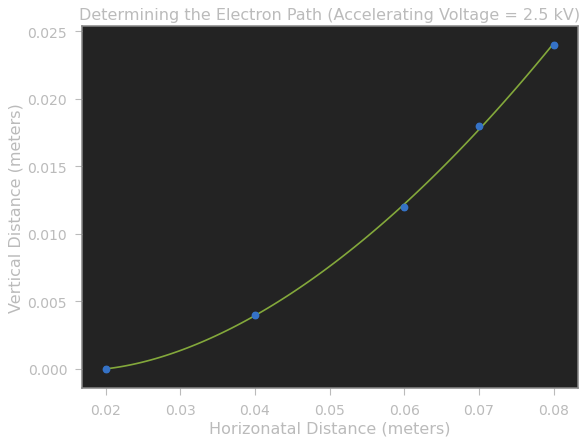

In [ ]:
xi = df3['x']
yi = df3['y']
sigmaxi = df3['dx']
sigmayi = df3['dy']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b+d'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*(x-B[1])**B[2] + B[3]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[2.55, 0.009, 2.0, -0.0003]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

yfit = fitfunction(popt,xl)

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)(X - (%0.4f +/- %0.4f))^(%0.4f +/- %0.4f) + (%0.4f +/- %0.4f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2],popt[3],perr[3]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

#plt.plot(xl,middle)
#plt.plot(xl,lower)
#plt.plot(xl,upper)
plt.plot(xl,yfit)

#########################

plt.xlabel('Horizonatal Distance (meters)')
plt.ylabel('Vertical Distance (meters)')
plt.title('Determining the Electron Path (Accelerating Voltage = 2.5 kV)')
plt.show()


In [ ]:
Va = 2.50
dVa = 0.01
Vp = 3.64
dVp = 0.01
C = popt[0]
dC = perr[0]
x_i3 = popt[1]
dx_i3 = perr[1]
alpha3 = popt[2]
dalpha3 = perr[2]
y_i3 = popt[3]
dy_i3 = perr[3]

deff3 = Vp/(4*C*Va)

ddeff3 = deff3*(dVp/Vp+dVa/Va+dC/C)

print('d$_{eff} = (%0.3f +/- %0.3f)' % (deff3,ddeff3))

print('xi = (%0.5f +/- %0.5f)' % (x_i3,dx_i3))
print('yi = (%0.5f +/- %0.5f)' % (y_i3,dy_i3))
print('alpha = (%0.5f +/- %0.5f)' % (alpha3,dalpha3))


d$_{eff} = (0.114 +/- 0.087)
xi = (0.01728 +/- 0.01121)
yi = (-0.00009 +/- 0.00073)
alpha = (1.76177 +/- 0.37076)


In [ ]:
# Summary of Part I

print('Va = 4.50kV: d$_{eff} = (%0.3f +/- %0.3f)' % (deff1,ddeff1))
print('Va = 3.50kV: d$_{eff} = (%0.3f +/- %0.3f)' % (deff2,ddeff2))
print('Va = 2.50kV: d$_{eff} = (%0.3f +/- %0.3f)' % (deff3,ddeff3))

Va = 4.50kV: d$_{eff} = (0.079 +/- 0.006)
Va = 3.50kV: d$_{eff} = (0.135 +/- 0.040)
Va = 2.50kV: d$_{eff} = (0.114 +/- 0.087)


# Determining the Effective Plate Separation

In [ ]:
# Create a Pandas DataFrame with data for part 2

# The data elements are [Vp, dVp, Va, dVa]

data4 = [[2.03,0.01,2.63,0.01], [2.11,0.01,2.80,0.01], [2.24,0.01,3.01,0.01],
         [2.40,0.01,3.21,0.01], [2.54,0.01,3.40,0.01], [2.70,0.01,3.61,0.01],
         [2.84,0.01,3.80,0.01], [2.98,0.01,4.01,0.01], [3.13,0.01,4.20,0.01],
         [3.28,0.01,4.41,0.01], [3.43,0.01,4.60,0.01], [3.57,0.01,4.80,0.01],
         [3.72,0.01,5.00,0.01]]
# create dataframe
df4 = pd.DataFrame(data4, columns = ['Vp', 'dVp','Va','dVa'])

print('Plate Separation Data:')
print(df4.to_string(index=False))

Plate Separation Data:
   Vp   dVp    Va   dVa
 2.03  0.01  2.63  0.01
 2.11  0.01  2.80  0.01
 2.24  0.01  3.01  0.01
 2.40  0.01  3.21  0.01
 2.54  0.01  3.40  0.01
 2.70  0.01  3.61  0.01
 2.84  0.01  3.80  0.01
 2.98  0.01  4.01  0.01
 3.13  0.01  4.20  0.01
 3.28  0.01  4.41  0.01
 3.43  0.01  4.60  0.01
 3.57  0.01  4.80  0.01
 3.72  0.01  5.00  0.01


Beta: [0.7272079 0.075981 ]
Beta Std Error: [0.0059828  0.02320222]
Beta Covariance: [[ 2.12565960e-05 -8.09058754e-05]
 [-8.09058754e-05  3.19700453e-04]]
Residual Variance: 1.6838981153405177
Inverse Condition #: 0.04096113891762388
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.727207902 +/- 0.005982804)X + (0.075981002 +/- 0.023202220)


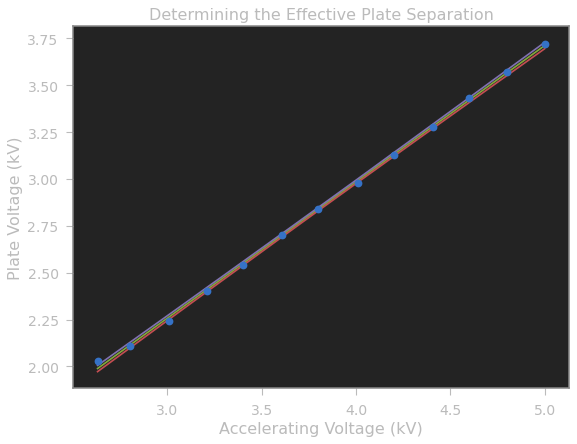

In [ ]:
xi = df4['Va']
yi = df4['Vp']
sigmaxi = df4['dVa']
sigmayi = df4['dVp']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = a*x+b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x+B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f)X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('Accelerating Voltage (kV)')
plt.ylabel('Plate Voltage (kV)')
plt.title('Determining the Effective Plate Separation')
plt.show()

## Analysis of Electron Path:   Accelerating Voltage = 4.5 kV

First of all, we see that the fit is linear, as expected.

Second, we see that the result for the slope is $(0.727 \pm 0.006)$.  

Third, we see that the y-intercept of the fit is $(0.076 \pm 0.023)$.  This is not
consistent with zero, as expected.

The theory predicts that this slope should be equal to: $\frac{4 \Delta y d_{eff}}{(\Delta x)^2}$.  Thus, we can calculate that:

$d_{eff} = slope \left( \frac{(\Delta x)^2}{4 \Delta y} \right)$

and 

$ \delta(d_{eff}) = d_{eff} \left( 2 \frac{\delta(\Delta x)}{\Delta x} + \frac{\delta(\Delta y)}{\Delta y} + \frac{\delta(slope)}{slope} \right) $

In [ ]:
slope = popt[0]
dslope = perr[0]

deltax = 0.100
ddeltax = 0.001
deltay = 0.020
ddeltay = 0.001

deff4 = slope*(deltax**2)/(4.0*deltay)
ddeff4 = deff4*(2*ddeltax/deltax + ddeltay/deltay + dslope/slope)



In [ ]:
# Final Summary
print ("Part II: Effective distance = (%0.3f +/- %0.3f) m" % (deff4,ddeff4))

print()
print("Part I:")
print('Va = 4.50kV: d_eff = (%0.3f +/- %0.3f) m' % (deff1,ddeff1))
print('Va = 3.50kV: d_eff = (%0.3f +/- %0.3f) m' % (deff2,ddeff2))
print('Va = 2.50kV: d_eff = (%0.3f +/- %0.3f) m' % (deff3,ddeff3))

Part II: Effective distance = (0.091 +/- 0.007) m

Part I:
Va = 4.50kV: d_eff = (0.079 +/- 0.006) m
Va = 3.50kV: d_eff = (0.135 +/- 0.040) m
Va = 2.50kV: d_eff = (0.114 +/- 0.087) m


Weighted Average = 0.0840 +/- 0.0044 m


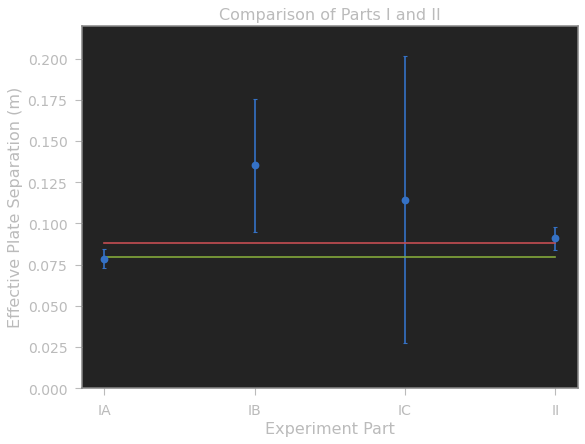

In [ ]:
x1 = ['IA','IB','IC','II']
y1 = np.array([deff1,deff2,deff3,deff4])
dy1 = np.array([ddeff1,ddeff2,ddeff3,ddeff4])

# Calculate the weighted average of the effective distance values.
def w_avg(x, dx):
    d = x
    w = 1.0/dx**2
    return (d * w).sum()/w.sum(), np.sqrt(1/w.sum())

average, daverage = w_avg(y1,dy1)
print ('Weighted Average = %0.4f +/- %0.4f m' % (average,daverage))
ylow = average-daverage
yhigh = average+daverage
y2 = [ylow,ylow,ylow,ylow]
y3 = [yhigh,yhigh,yhigh,yhigh]


plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(x1, y1, yerr=dy1, fmt='o', capsize=2, capthick=1)
plt.plot(x1,y2)
plt.plot(x1,y3)

#########################

plt.xlabel('Experiment Part')
plt.ylabel('Effective Plate Separation (m)')
plt.title('Comparison of Parts I and II')
plt.ylim(0,0.22)
plt.show()

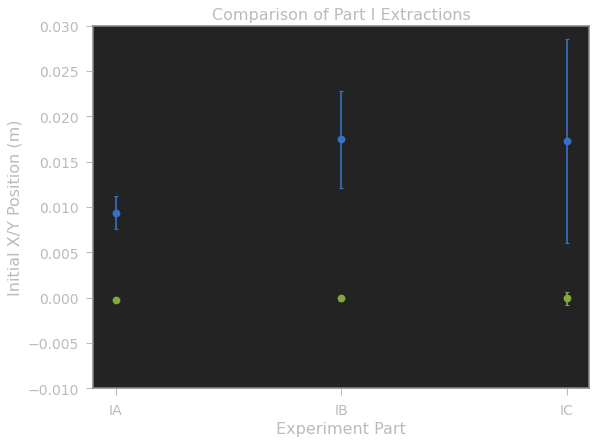

In [ ]:
x1 = ['IA','IB','IC']
y1 = [x_i1,x_i2,x_i3]
dy1 = [dx_i1,dx_i2,dx_i3]
y2 = [y_i1,y_i2,y_i3]
dy2 = [dy_i1,dy_i2,dy_i3]

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(x1, y1, yerr=dy1, fmt='o', capsize=2, capthick=1)
plt.errorbar(x1, y2, yerr=dy2, fmt='o', capsize=2, capthick=1)
#########################

plt.xlabel('Experiment Part')
plt.ylabel('Initial X/Y Position (m)')
plt.title('Comparison of Part I Extractions')
plt.ylim(-0.01,0.03)
plt.show()

Weighted Average = 1.9819 +/- 0.0407 m


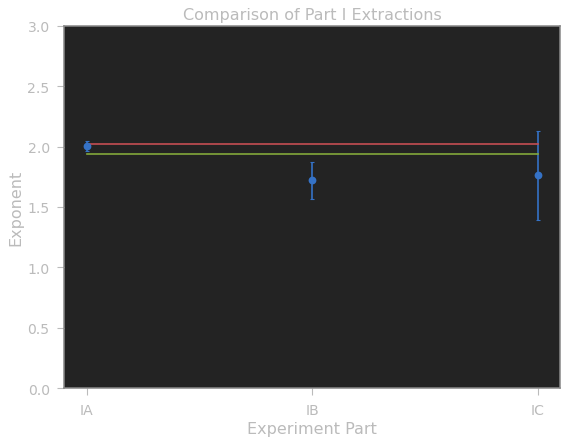

In [ ]:
x1 = ['IA','IB','IC']
y1 = np.array([alpha1,alpha2,alpha3])
dy1 = np.array([dalpha1,dalpha2,dalpha3])

average, daverage = w_avg(y1,dy1)
print ('Weighted Average = %0.4f +/- %0.4f m' % (average,daverage))
ylow = average-daverage
yhigh = average+daverage
y2 = [ylow,ylow,ylow]
y3 = [yhigh,yhigh,yhigh]

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(x1, y1, yerr=dy1, fmt='o', capsize=2, capthick=1)
plt.plot(x1,y2)
plt.plot(x1,y3)
#########################

plt.xlabel('Experiment Part')
plt.ylabel('Exponent')
plt.title('Comparison of Part I Extractions')
plt.ylim(0.0,3.0)
plt.show()